In [7]:
import os

import torch
import torchaudio

from other.data.audio_utils import AudioWorker


data_dir = 'datasets\microphone-irs'
files = sorted(os.listdir(data_dir))

In [ ]:
new_target_sr = 16000
new_dir = f'datasets\microphone-irs-{new_target_sr}'
os.makedirs(new_dir, exist_ok=True)
for file in files:
    file_path = os.path.join(data_dir, file)
    new_path = os.path.join(new_dir, file)
    aw = AudioWorker(file_path)
    aw.load()
    aw.resample(new_target_sr)
    aw.wave = aw.wave[:, :int(0.015 * aw.rate)]
    aw.wave = aw.wave / aw.wave.norm()
    torchaudio.save(new_path, aw.wave, new_target_sr)

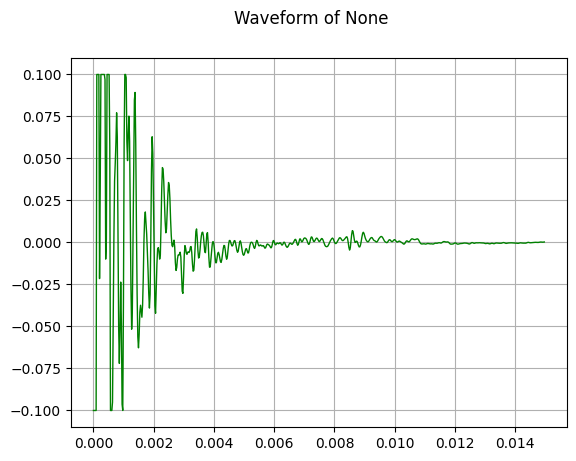

In [8]:
file_path = os.path.join(data_dir, files[0])
aw = AudioWorker(file_path)
aw.load()
aw.wave = aw.wave[:, :int(0.015 * aw.rate)]
aw.wave = torch.clamp(aw.wave, -0.1, 0.1)
aw.plot_waveform()